### Data 512 Project Part 1: Common Analysis

In [189]:
! pip install ruptures

     |████████████████████████████████| 399 kB 5.3 MB/s eta 0:00:01


In [190]:
# Import the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ruptures as rpt

In [194]:
# Importing the datasets

df_confirmed_cases_us = pd.read_csv('./raw_data/RAW_us_confirmed_cases.csv')
df_mask_survey = pd.read_csv("./raw_data/mask-use-by-county.csv")
df_cdc_mask = pd.read_csv("./raw_data/U.S._State_and_Territorial_Public_Mask_Mandates_From_April_10__2020_through_August_15__2021_by_County_by_Day.csv")

In [5]:
# Looking at the data

df_confirmed_cases_us.head()

,Province_State,Admin2,UID,iso2,iso3,code3,FIPS,Country_Region,Lat,Long_,...,10/26/22,10/27/22,10/28/22,10/29/22,10/30/22,10/31/22,11/1/22,11/2/22,11/3/22,11/4/22
0,Alabama,Autauga,84001001,US,USA,840,1001.0,US,32.539527,-86.644082,...,18480,18511,18511,18511,18511,18511,18511,18511,18511,18511
1,Alabama,Baldwin,84001003,US,USA,840,1003.0,US,30.727750,-87.722071,...,65895,65973,65973,65973,65973,65973,65973,65973,65973,65973
2,Alabama,Barbour,84001005,US,USA,840,1005.0,US,31.868263,-85.387129,...,6926,6930,6930,6930,6930,6930,6930,6930,6930,6930
3,Alabama,Bibb,84001007,US,USA,840,1007.0,US,32.996421,-87.125115,...,7560,7575,7575,7575,7575,7575,7575,7575,7575,7575
4,Alabama,Blount,84001009,US,USA,840,1009.0,US,33.982109,-86.567906,...,17286,17320,17320,17320,17320,17320,17320,17320,17320,17320


Here the attribute 'Admin2' corresponds to County and since we are doing the analysis based on the assigned counties, we will filter this data for our county. However, since 'Shelby' as a county exists for 9 states, we filter on the specific state as well.

In [6]:
county = 'Shelby'
state = 'Tennessee'

df_confirmed_cases_county = df_confirmed_cases_us[(df_confirmed_cases_us.Admin2 == county) & \
                                                  (df_confirmed_cases_us.Province_State == state)]




In [7]:
df_confirmed_cases_county.head()

,Province_State,Admin2,UID,iso2,iso3,code3,FIPS,Country_Region,Lat,Long_,...,10/26/22,10/27/22,10/28/22,10/29/22,10/30/22,10/31/22,11/1/22,11/2/22,11/3/22,11/4/22
2682,Tennessee,Shelby,84047157,US,USA,840,47157.0,US,35.186478,-89.896924,...,275944,276073,276169,276199,276199,276199,276199,276199,276199,276199


Here the FIPS which refers to Federal Information Processing Standards uniquely identifies a county. The first two digits identify the State while the last three digits identify the County. This will be used later in the other datasets to identify the assigned county, hence, we will store it in a variable.

In [8]:
fips_county = int(df_confirmed_cases_county['FIPS'])

In [9]:
print('The FIPS for {} county in {} state is {}.'.format(county, state, fips_county))

The FIPS for Shelby county in Tennessee state is 47157.


Now, we need to get the time series data for the county from the raw confirmed cases dataframe. For this, I use Pandas.melt() to pivot the time series columns into long format from wide format.

In [10]:
# Looking at the data again for our county

df_confirmed_cases_county

,Province_State,Admin2,UID,iso2,iso3,code3,FIPS,Country_Region,Lat,Long_,...,10/26/22,10/27/22,10/28/22,10/29/22,10/30/22,10/31/22,11/1/22,11/2/22,11/3/22,11/4/22
2682,Tennessee,Shelby,84047157,US,USA,840,47157.0,US,35.186478,-89.896924,...,275944,276073,276169,276199,276199,276199,276199,276199,276199,276199


In [11]:
# We need to pivot the date columns to get time series data for the county
# Reference: https://www.geeksforgeeks.org/python-pandas-melt/

county_ts = pd.melt(df_confirmed_cases_county, id_vars= df_confirmed_cases_county.columns[1:11] \
                   , value_vars= df_confirmed_cases_county.columns[11:] \
                   , var_name = 'date_series', value_name = '# of confirmed cases')


In [12]:
county_ts

,Admin2,UID,iso2,iso3,code3,FIPS,Country_Region,Lat,Long_,Combined_Key,date_series,# of confirmed cases
0,Shelby,84047157,US,USA,840,47157.0,US,35.186478,-89.896924,"Shelby, Tennessee, US",1/22/20,0
1,Shelby,84047157,US,USA,840,47157.0,US,35.186478,-89.896924,"Shelby, Tennessee, US",1/23/20,0
2,Shelby,84047157,US,USA,840,47157.0,US,35.186478,-89.896924,"Shelby, Tennessee, US",1/24/20,0
3,Shelby,84047157,US,USA,840,47157.0,US,35.186478,-89.896924,"Shelby, Tennessee, US",1/25/20,0
4,Shelby,84047157,US,USA,840,47157.0,US,35.186478,-89.896924,"Shelby, Tennessee, US",1/26/20,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1013,Shelby,84047157,US,USA,840,47157.0,US,35.186478,-89.896924,"Shelby, Tennessee, US",10/31/22,276199
1014,Shelby,84047157,US,USA,840,47157.0,US,35.186478,-89.896924,"Shelby, Tennessee, US",11/1/22,276199
1015,Shelby,84047157,US,USA,840,47157.0,US,35.186478,-89.896924,"Shelby, Tennessee, US",11/2/22,276199
1016,Shelby,84047157,US,USA,840,47157.0,US,35.186478,-89.896924,"Shelby, Tennessee, US",11/3/22,276199


In [13]:
# Checking type of the column 'date_series'

print(county_ts['date_series'].dtypes)

object


In [16]:
# Object data type means string. Now, we will convert it to datetime format. 
# Reference: https://sparkbyexamples.com/pandas/pandas-change-string-object-to-date-in-dataframe/#:~:text=You%20see%20that%20the%20Datatype,m%25d')%20function.&text=Yields%20below%20output.,-InsertedDate%20Fee%200

county_ts['date_series'] = pd.to_datetime(county_ts['date_series'], format = '%m/%d/%y')

In [17]:
print(county_ts['date_series'].dtypes)

datetime64[ns]


In [18]:
county_ts['date_series'][0:10]

0   2020-01-22
1   2020-01-23
2   2020-01-24
3   2020-01-25
4   2020-01-26
5   2020-01-27
6   2020-01-28
7   2020-01-29
8   2020-01-30
9   2020-01-31
Name: date_series, dtype: datetime64[ns]

Now we will filter the dates as well since we need to look at the dates from Feb 1st, 2020 through Oct 1st, 2021

In [19]:
county_ts = county_ts.loc[(county_ts['date_series'] >= '2020-02-01') & (county_ts['date_series'] <= '2021-10-01')]

In [20]:
county_ts.head()

,Admin2,UID,iso2,iso3,code3,FIPS,Country_Region,Lat,Long_,Combined_Key,date_series,# of confirmed cases
10,Shelby,84047157,US,USA,840,47157.0,US,35.186478,-89.896924,"Shelby, Tennessee, US",2020-02-01,0
11,Shelby,84047157,US,USA,840,47157.0,US,35.186478,-89.896924,"Shelby, Tennessee, US",2020-02-02,0
12,Shelby,84047157,US,USA,840,47157.0,US,35.186478,-89.896924,"Shelby, Tennessee, US",2020-02-03,0
13,Shelby,84047157,US,USA,840,47157.0,US,35.186478,-89.896924,"Shelby, Tennessee, US",2020-02-04,0
14,Shelby,84047157,US,USA,840,47157.0,US,35.186478,-89.896924,"Shelby, Tennessee, US",2020-02-05,0


In [21]:
county_ts.tail()

,Admin2,UID,iso2,iso3,code3,FIPS,Country_Region,Lat,Long_,Combined_Key,date_series,# of confirmed cases
614,Shelby,84047157,US,USA,840,47157.0,US,35.186478,-89.896924,"Shelby, Tennessee, US",2021-09-27,139566
615,Shelby,84047157,US,USA,840,47157.0,US,35.186478,-89.896924,"Shelby, Tennessee, US",2021-09-28,139838
616,Shelby,84047157,US,USA,840,47157.0,US,35.186478,-89.896924,"Shelby, Tennessee, US",2021-09-29,140184
617,Shelby,84047157,US,USA,840,47157.0,US,35.186478,-89.896924,"Shelby, Tennessee, US",2021-09-30,140470
618,Shelby,84047157,US,USA,840,47157.0,US,35.186478,-89.896924,"Shelby, Tennessee, US",2021-10-01,140767


In [26]:
county_ts.columns[10:]

Index(['date_series', '# of confirmed cases'], dtype='object')

In [28]:
# removed the other columns
county_ts = county_ts[county_ts.columns[10:]]

In [29]:
county_ts.head()

,date_series,# of confirmed cases
10,2020-02-01,0
11,2020-02-02,0
12,2020-02-03,0
13,2020-02-04,0
14,2020-02-05,0


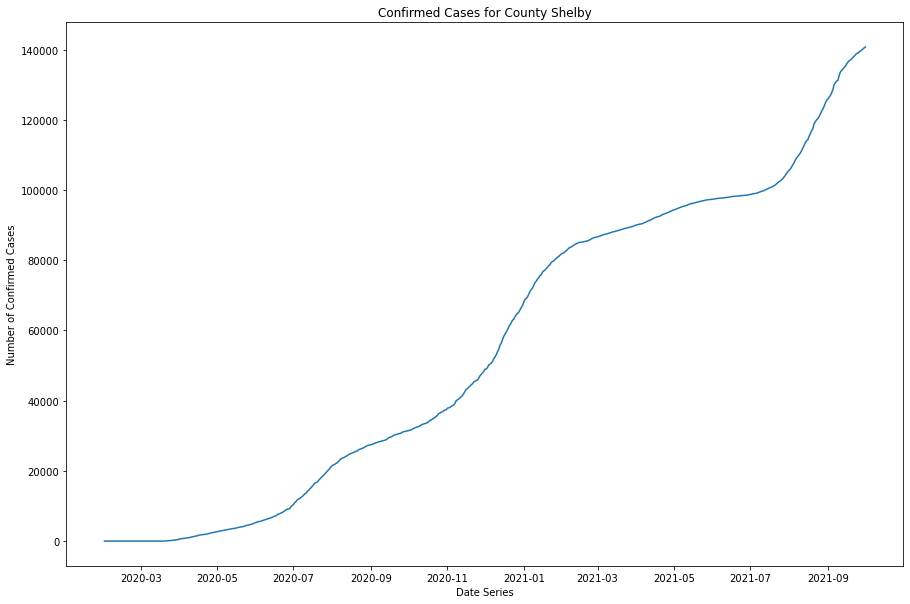

In [249]:
plt.figure(figsize = (15,10))
confirmed_cases_plot = sns.lineplot(data= county_ts, x = 'date_series', y = '# of confirmed cases')
plt.title('Confirmed Cases for County Shelby')
plt.xlabel('Date Series')
plt.ylabel('Number of Confirmed Cases')
fig.set_size_inches(14, 8)
fig.savefig('Total_Confirmed_cases.png', dpi=100)

From looking at this graph, we can clearly see that overall the number of cases kept increasing from 2020 through Oct. 2021. This can be attributed to the high spread of virus but also to increased testing and awareness.

Now let us look at the mask data

In [195]:
# Looking at the mask data

df_mask_survey.head()

,COUNTYFP,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS
0,1001,0.053,0.074,0.134,0.295,0.444
1,1003,0.083,0.059,0.098,0.323,0.436
2,1005,0.067,0.121,0.120,0.201,0.491
3,1007,0.020,0.034,0.096,0.278,0.572
4,1009,0.053,0.114,0.180,0.194,0.459


Here COUNTYFP again refers to the FIPS value (for Shelby it is 47157) that uniquely identifies a county

In [196]:
# We need to first filter for the county and state

df_mask_survey_county = df_mask_survey[df_mask_survey['COUNTYFP'] == fips_county ]

In [197]:
# This gets the mask use survey data for the Shelby county

df_mask_survey_county

,COUNTYFP,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS
2506,47157,0.034,0.025,0.105,0.184,0.653


In [198]:
# We need to apply the same filters for cdc mask mandate data as well

# Looking at the cdc mask data

df_cdc_mask.head()

,State_Tribe_Territory,County_Name,FIPS_State,FIPS_County,date,order_code,Face_Masks_Required_in_Public,Source_of_Action,URL,Citation
0,AL,Autauga County,1,1,4/10/2020,2,NaN,NaN,NaN,NaN
1,AL,Autauga County,1,1,4/11/2020,2,NaN,NaN,NaN,NaN
2,AL,Autauga County,1,1,4/12/2020,2,NaN,NaN,NaN,NaN
3,AL,Autauga County,1,1,4/13/2020,2,NaN,NaN,NaN,NaN
4,AL,Autauga County,1,1,4/14/2020,2,NaN,NaN,NaN,NaN


Here the County_name refers to the county and also FIPS_State and FIPS_County, so we need to filter the data using these attributes

In [199]:
df_cdc_mask_county = df_cdc_mask[(df_cdc_mask['FIPS_State'] == int(str(fips_county)[:2])) & \
                                 (df_cdc_mask['FIPS_County'] == int(str(fips_county)[2:])) \
                                & (df_cdc_mask['County_Name'] == county +  " " + "County")]
                                 
                 

In [200]:
df_cdc_mask_county.head()

,State_Tribe_Territory,County_Name,FIPS_State,FIPS_County,date,order_code,Face_Masks_Required_in_Public,Source_of_Action,URL,Citation
666596,TN,Shelby County,47,157,4/10/2020,2,NaN,NaN,NaN,NaN
666597,TN,Shelby County,47,157,4/11/2020,2,NaN,NaN,NaN,NaN
666598,TN,Shelby County,47,157,4/12/2020,2,NaN,NaN,NaN,NaN
666599,TN,Shelby County,47,157,4/13/2020,2,NaN,NaN,NaN,NaN
666600,TN,Shelby County,47,157,4/14/2020,2,NaN,NaN,NaN,NaN


In [201]:
# Seeing how many unique values do we have for this column
df_cdc_mask_county['Face_Masks_Required_in_Public'].unique()

array([nan], dtype=object)

In [202]:
print('The total observations in df for {} county: {} '.format(county, len(df_cdc_mask_county)))
print('Total NA values in the df for {} county: {}'.format(county, df_cdc_mask_county['Face_Masks_Required_in_Public'].isna().sum()))

The total observations in df for Shelby county: 493 
Total NA values in the df for Shelby county: 493


In [203]:
# We will just fill NA with no values for the face mask mandates in public

df_cdc_mask_county['Face_Masks_Required_in_Public'] = df_cdc_mask_county['Face_Masks_Required_in_Public'].fillna('No')

/var/folders/jx/zmvdb9015r5cmfk2_vpyps180000gn/T/ipykernel_46731/1724115551.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cdc_mask_county['Face_Masks_Required_in_Public'] = df_cdc_mask_county['Face_Masks_Required_in_Public'].fillna('No')


In [204]:
df_cdc_mask_county.tail()

,State_Tribe_Territory,County_Name,FIPS_State,FIPS_County,date,order_code,Face_Masks_Required_in_Public,Source_of_Action,URL,Citation
1429062,TN,Shelby County,47,157,8/11/2021,2,No,NaN,NaN,NaN
1429063,TN,Shelby County,47,157,8/12/2021,2,No,NaN,NaN,NaN
1429064,TN,Shelby County,47,157,8/13/2021,2,No,NaN,NaN,NaN
1429065,TN,Shelby County,47,157,8/14/2021,2,No,NaN,NaN,NaN
1429066,TN,Shelby County,47,157,8/15/2021,2,No,NaN,NaN,NaN


Since, the value for this attribute is all null, we will assume that null means no masks mandate was required in public. And, since for our dataset it is all null, we assume that the mask mandate in public was never required in our given county.

In [205]:
# Now we will proceed and filter our cdc mandate data as well for the dates of our analysis although all of them should
# qualify

df_cdc_mask_county['date'] = pd.to_datetime(df_cdc_mask_county['date'])

/var/folders/jx/zmvdb9015r5cmfk2_vpyps180000gn/T/ipykernel_46731/3343722501.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cdc_mask_county['date'] = pd.to_datetime(df_cdc_mask_county['date'])


In [206]:
df_cdc_mask_county = df_cdc_mask_county.loc[(df_cdc_mask_county['date'] >= '2/1/2020') \
                                            & (df_cdc_mask_county['date'] <= '10/1/2021')]

In [207]:
len(df_cdc_mask_county)

493

In [208]:
df_cdc_mask_county.head()

,State_Tribe_Territory,County_Name,FIPS_State,FIPS_County,date,order_code,Face_Masks_Required_in_Public,Source_of_Action,URL,Citation
666596,TN,Shelby County,47,157,2020-04-10,2,No,NaN,NaN,NaN
666597,TN,Shelby County,47,157,2020-04-11,2,No,NaN,NaN,NaN
666598,TN,Shelby County,47,157,2020-04-12,2,No,NaN,NaN,NaN
666599,TN,Shelby County,47,157,2020-04-13,2,No,NaN,NaN,NaN
666600,TN,Shelby County,47,157,2020-04-14,2,No,NaN,NaN,NaN


In [209]:
df_cdc_mask_county.tail()

,State_Tribe_Territory,County_Name,FIPS_State,FIPS_County,date,order_code,Face_Masks_Required_in_Public,Source_of_Action,URL,Citation
1429062,TN,Shelby County,47,157,2021-08-11,2,No,NaN,NaN,NaN
1429063,TN,Shelby County,47,157,2021-08-12,2,No,NaN,NaN,NaN
1429064,TN,Shelby County,47,157,2021-08-13,2,No,NaN,NaN,NaN
1429065,TN,Shelby County,47,157,2021-08-14,2,No,NaN,NaN,NaN
1429066,TN,Shelby County,47,157,2021-08-15,2,No,NaN,NaN,NaN


In [210]:
df_cdc_plot = df_cdc_mask_county.set_index('date')['Face_Masks_Required_in_Public']


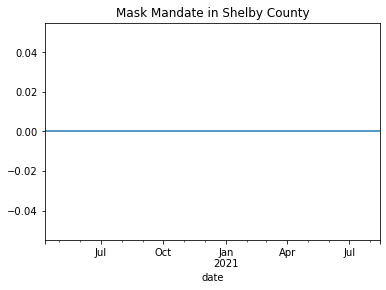

In [250]:
df_cdc_plot.map({'Yes': 1, 'No' : 0}).plot()
plt.title('Mask Mandate in Shelby County')
fig.set_size_inches(14, 8)
fig.savefig('Mask_mandates_yes_no.png', dpi=100)

This again clearly visualizes our inference from above that mask was never made mandatory in Shelby County in Tennesse. This could however be false as well due to the fact that the attribute 'Face Masks required in public' was not captured in cdc data for this county and we then took a conservative approach that NA would be taken as No.

In [212]:
# Saving the results

county_ts.to_csv('./Results/Confirmed_cases_Shelby.csv')
df_cdc_mask_county.to_csv('./Results/cdc_mask_Shelby.csv')    
df_mask_survey_county.to_csv('./Results/mask_survey_Shelby.csv')

In [213]:
county_ts.head()

,date_series,# of confirmed cases,case_rate
10,2020-02-01,0,0.0
11,2020-02-02,0,0.0
12,2020-02-03,0,0.0
13,2020-02-04,0,0.0
14,2020-02-05,0,0.0


In [214]:
county_ts['case_rate'] = pd.Series(np.gradient(county_ts['# of confirmed cases']), county_ts['date_series'], name = 'case_rate').values

In [215]:
county_ts.head()

,date_series,# of confirmed cases,case_rate
10,2020-02-01,0,0.0
11,2020-02-02,0,0.0
12,2020-02-03,0,0.0
13,2020-02-04,0,0.0
14,2020-02-05,0,0.0


In [216]:
county_ts.tail()

,date_series,# of confirmed cases,case_rate
614,2021-09-27,139566,263.5
615,2021-09-28,139838,309.0
616,2021-09-29,140184,316.0
617,2021-09-30,140470,291.5
618,2021-10-01,140767,297.0


In [246]:
county_ts.case_rate.max()

1210.0

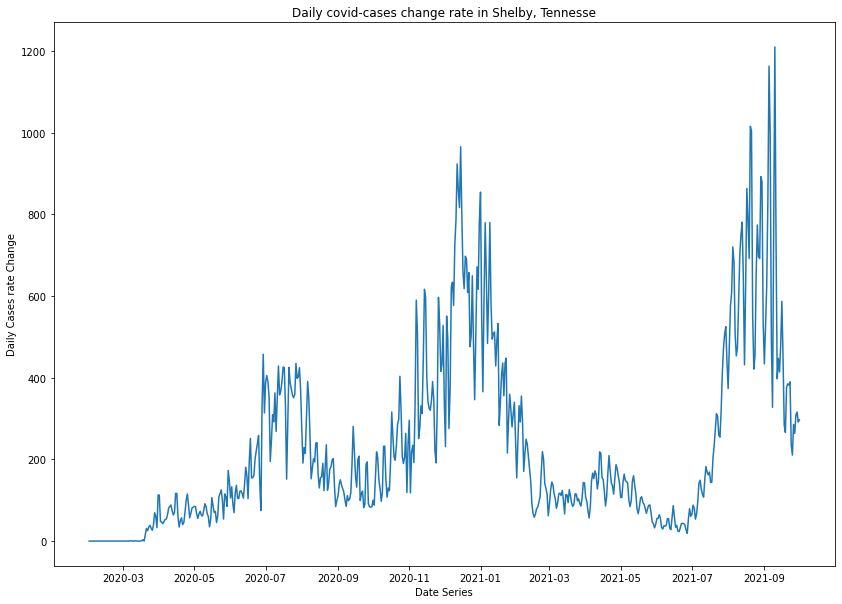

In [251]:
plt.figure(figsize =(14,10))
sns.lineplot(data = county_ts , x = 'date_series', y = 'case_rate')
plt.xlabel('Date Series')
plt.ylabel('Daily Cases rate Change')
plt.title('Daily covid-cases change rate in Shelby, Tennesse')
plt.show()
fig.set_size_inches(14, 8)
fig.savefig('Daily_covid_cases_change_rate.png', dpi=100)

We see an onset of covid cases from March end following a slow upward trend. This surprisinglly falls significantly during the period ranging form 08/2020 to 10/2020 while again spiking up and then again falling down from 02/2021 to 07/2021. This is again followed by a spike in cases. On one hand, I believe that this is upward-downward trend might be due to the various mask mandates that might have been put in place but since we do not have that data for our county, we can't certainly say that. And if we follow our assumption, this might correlate with the fact that there were no mask mandates due to which our covid cases follow a up-down trend due to no regularization. This graph also correlates with our initial graph of total covid cases in Shelby (shown above).

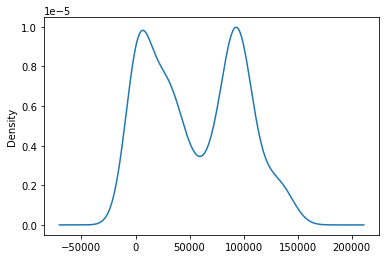

In [252]:
county_ts['# of confirmed cases'].plot.kde()
fig.set_size_inches(14, 8)
fig.savefig('Density_plot.png', dpi=100)

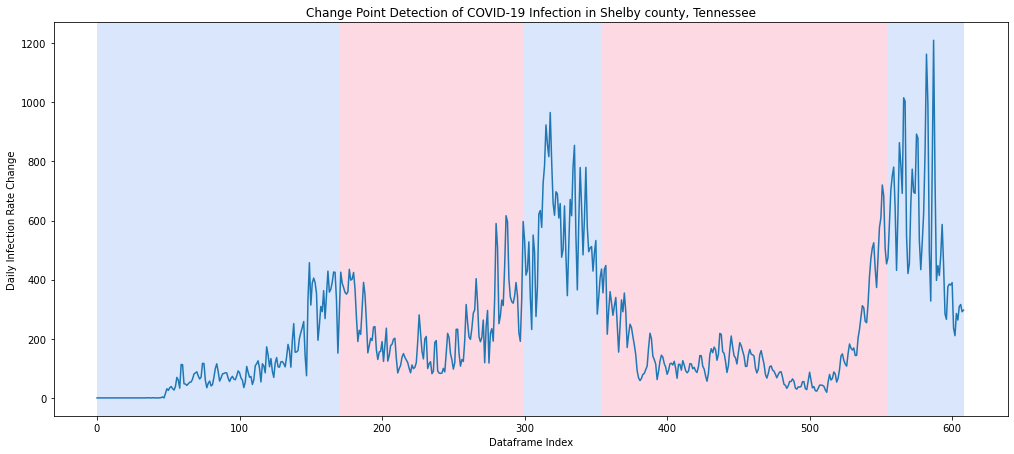

In [253]:
# Identifying the change points in our data

data = np.array(county_ts['# of confirmed cases'])

model='rbf'
algo= rpt.Pelt(model=model).fit(data)
result=algo.predict(pen=10)

breaks_rpt=[]
for i in result:
    breaks_rpt.append(county_ts.index[i-1])

rpt.display(covid_cases, result, figsize=(14,6))
plt.title("Change Point Detection of COVID-19 Infection in Shelby county, Tennessee")
plt.xlabel("Dataframe Index")
plt.ylabel("Daily Infection Rate Change")
plt.show()
fig.set_size_inches(14, 8)
fig.savefig('change_point_detection.png', dpi=100)

Here we are detecting the change points through the pelt method that is helping us to identify the anomalies in our data. Ignoring the first change, we see that the identified change points again aligns with our first two graphs. 

Change Point Detection (or CPD) helps us to detect abrupt shifts in time series trends. And since our given data is offline, we are using offline CPD which is why we are using the ruptures library that provides the context for offline changepoint detection. The Pruned Exact Linear Time (PELT) method is being used to detect changepoints through the minimalization of costs. 

Speaking about this graph, we can clearly see the change points. The red highlighted areas are refering to the anomalous sequences in our series. We can clearly see that they refer to the time points when the case_rate was low. Now, since we do not have any mask mandate time series from our data to which we can compare this above plot to,  we will refer to the CDC guidelines and use those to do further analysis on whether mask mandates caused these visible trends that we see in our data. 

In [232]:
# Since we do not have masking on and off timeline for our data, we will go with this approach of following the 
# national dates given by CDC

mask_guidelines_1 = '2020-04-03'
openspace_guidelines_removed1 = '2021-01-01'
openspace_guidelines_set2  = '2021-02-01'
openspace_guidelines_removed2 = '2021-06-10'
all_guidelines_removed = '2022-02-25'

In [234]:
#Adding a separate column for mask guidelines by CDC in our analysis dataframe

all_mask_guidelines=[]

for i in list(county_ts.date_series):
    if str(i) < mask_guidelines_1:
        all_mask_guidelines.append("No_mask_required")
    elif str(i) < openspace_guidelines_removed1:
        all_mask_guidelines.append("Mask_required_all_places")
    elif str(i) < openspace_guidelines_set2:
        all_mask_guidelines.append("Mask_required_close_spaces")
    elif str(i) < openspace_guidelines_removed2:
        all_mask_guidelines.append("Mask_required_all_places")
    elif str(i) < all_guidelines_removed:
        all_mask_guidelines.append("Mask_required_close_spaces")
    else:
        all_mask_guidelines.append("No_mask_required")
        
county_ts['Masks_requirement']= all_mask_guidelines

In [235]:
# Fit and predict on the pelt search method for ruptures again 
casesdata=np.array(county_ts['case_rate'])

model='rbf'
algo=rpt.Pelt(model=model).fit(casesdata)
result=algo.predict(pen=10)

breaks_rpt=[]
for i in result:
    breaks_rpt.append(county_ts.index[i-1])

In [238]:
# Visualize

In [243]:
mask_all_places = county_ts[county_ts['Masks_requirement'] == 'Mask_required_all_places']
mask_close_spaces = county_ts[county_ts['Masks_requirement'] == 'Mask_required_close_spaces']
no_masks_required = county_ts[county_ts['Masks_requirement'] == 'No_mask_required']

In [244]:
mask_all_places

,date_series,# of confirmed cases,case_rate,Masks_requirement
72,2020-04-03,718,47.0,Mask_required_all_places
73,2020-04-04,747,42.5,Mask_required_all_places
74,2020-04-05,803,47.5,Mask_required_all_places
75,2020-04-06,842,53.0,Mask_required_all_places
76,2020-04-07,909,54.0,Mask_required_all_places
...,...,...,...,...
500,2021-06-05,97610,33.5,Mask_required_all_places
501,2021-06-06,97636,29.5,Mask_required_all_places
502,2021-06-07,97669,37.5,Mask_required_all_places
503,2021-06-08,97711,36.5,Mask_required_all_places


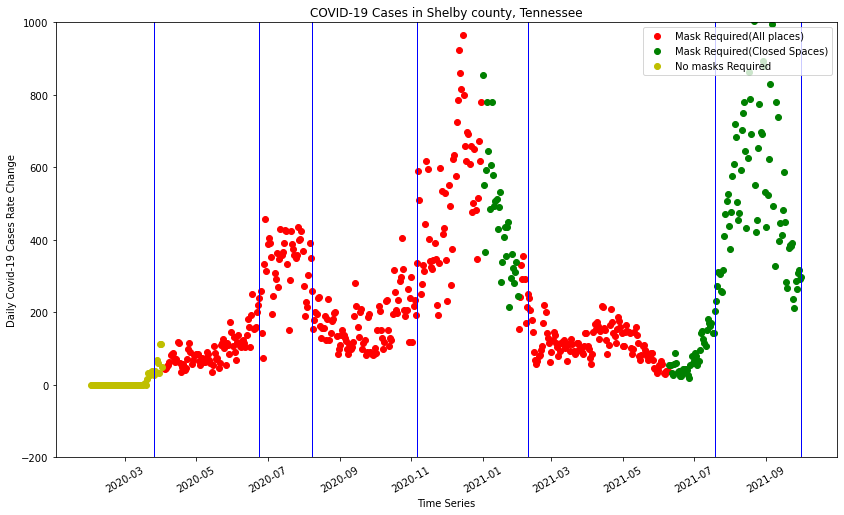

In [248]:
# Filtering data

fig = plt.gcf()
plt.xticks(rotation=30)
plt.title("COVID-19 Cases in Shelby county, Tennessee")
plt.xlabel("Time Series")
plt.ylabel("Daily Covid-19 Cases Rate Change")
plt.ylim((-200,1000))

# Plotting different data points setting mask policy as the color

plt.plot(mask_all_places.date_series,mask_all_places.case_rate, 'ro', label='Mask Required(All places)')
plt.plot(mask_close_spaces.date_series,mask_close_spaces.case_rate, 'go', label='Mask Required(Closed Spaces)')
plt.plot(no_masks_required.date_series,no_masks_required.case_rate, 'yo', label='No masks Required')


leg = plt.legend(loc="upper right")

# Plotting the verticle lines for highlighting changepoints
for x in breaks_rpt:
    plt.axvline(county_ts.loc[x, 'date_series'], lw=1, color='blue', label='Change points')
    
fig.set_size_inches(14, 8)
fig.savefig('Daily_cases_change_rate.png', dpi=100)